In [39]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [40]:
from google.colab import files
uploaded = files.upload()

Saving datasets_56485_108594_Breast_cancer_data.csv to datasets_56485_108594_Breast_cancer_data (2).csv


In [41]:
df = pd.read_csv(io.BytesIO(uploaded['datasets_56485_108594_Breast_cancer_data.csv']))

In [42]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [43]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [45]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


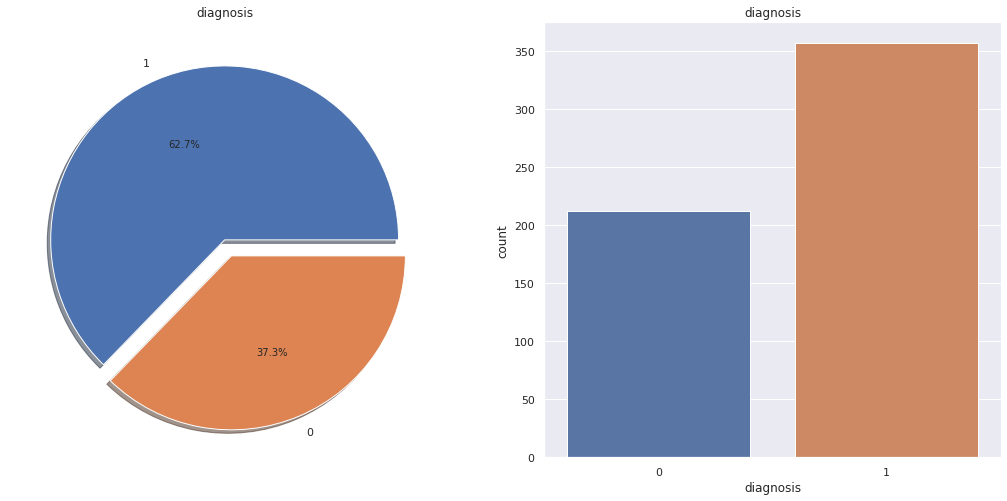

In [46]:
# Data Visualization

f,ax=plt.subplots(1,2,figsize=(18,8))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()


# 1 is for malignant, 0 is for benign

**Normalizing all the input variables**

In [47]:
from scipy.stats import norm
from scipy import stats
def diagnostic_plots(df, variable):## defining a function to plot histogram and Q-Q plot
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.distplot(df[variable], fit=norm);
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    plt.show()

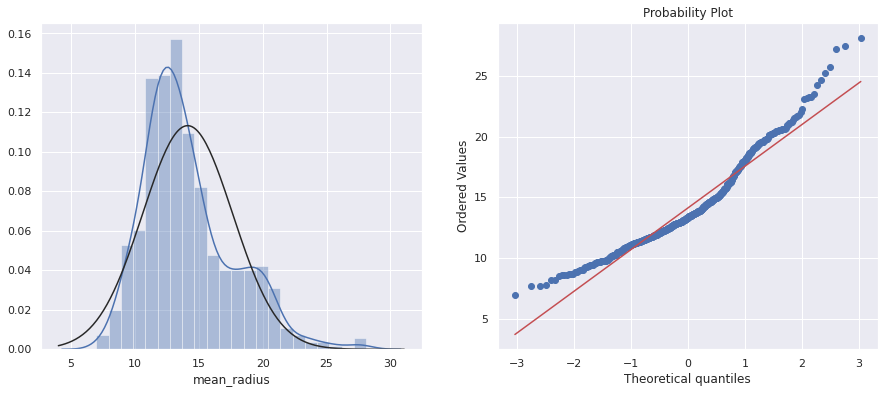

In [48]:
diagnostic_plots(df, 'mean_radius')

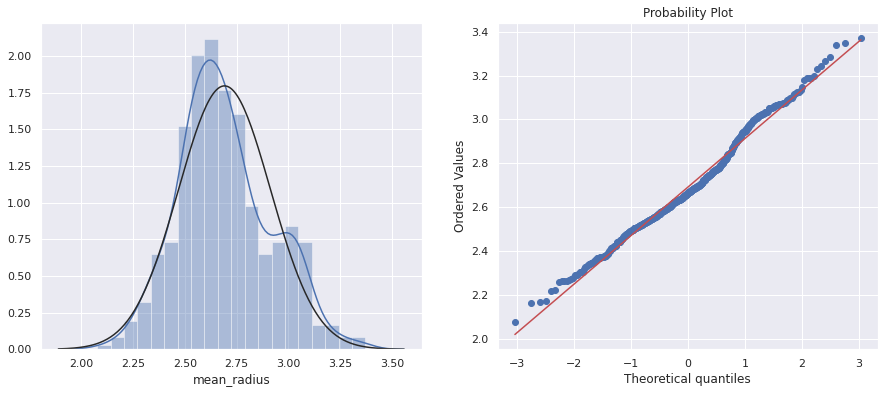

In [49]:
#applying log transformation
df['mean_radius'] = np.log(df['mean_radius'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df, 'mean_radius')

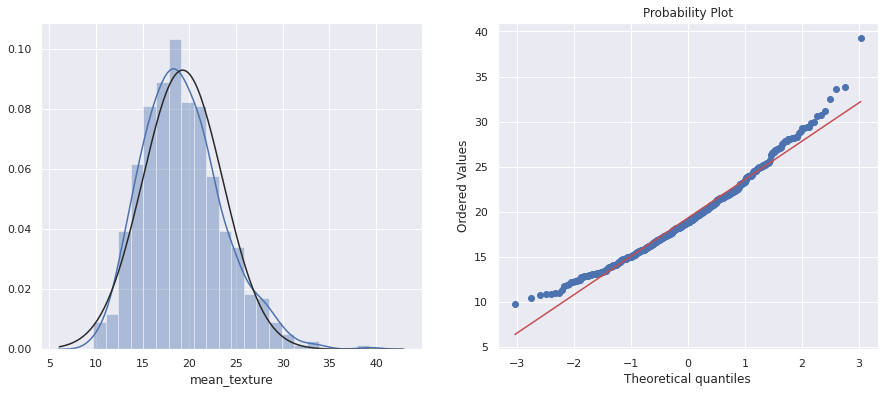

In [50]:
diagnostic_plots(df, 'mean_texture')

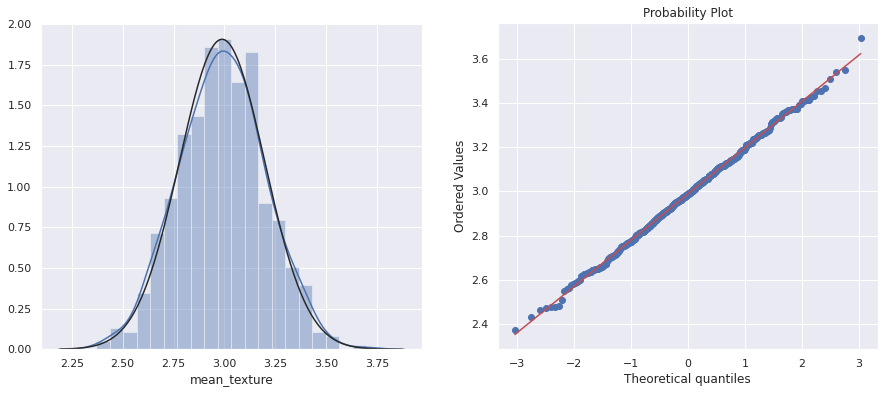

In [51]:
#applying log transformation
df['mean_texture'] = np.log(df['mean_texture'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df, 'mean_texture')

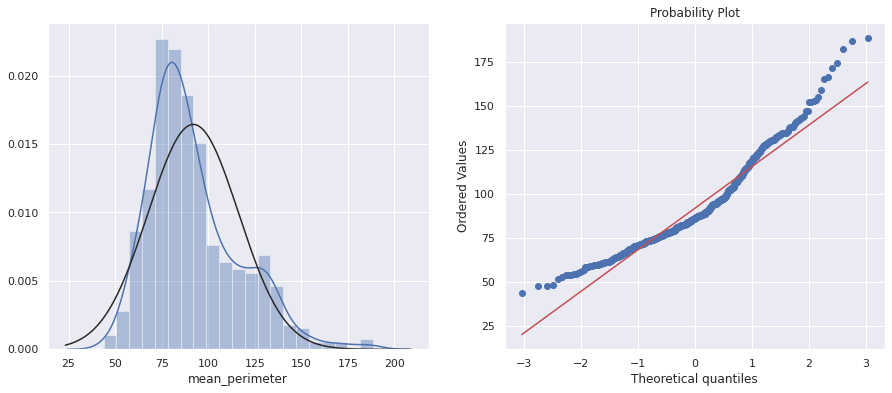

In [52]:
diagnostic_plots(df, 'mean_perimeter')

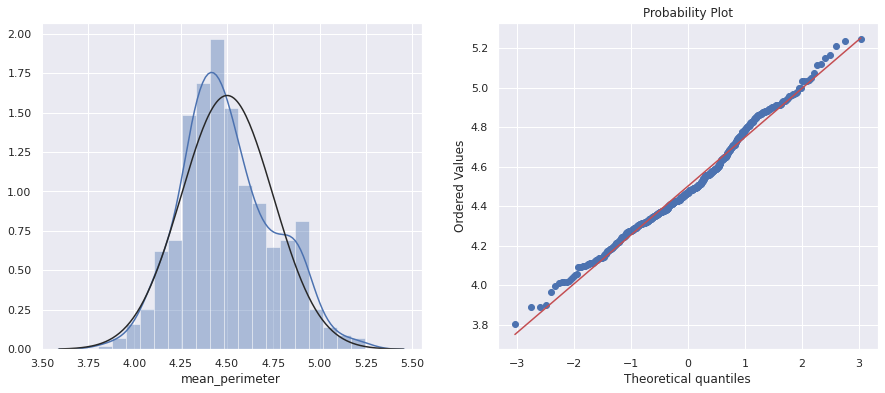

In [53]:
#applying log transformation
df['mean_perimeter'] = np.log(df['mean_perimeter'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df, 'mean_perimeter')

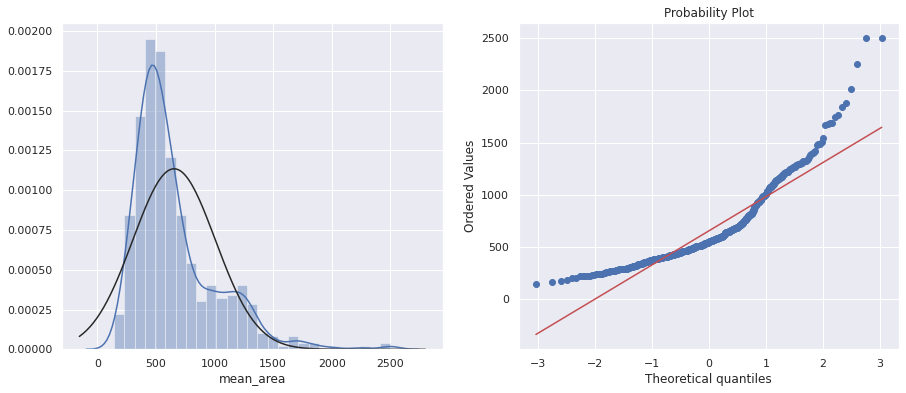

In [54]:
diagnostic_plots(df, 'mean_area')

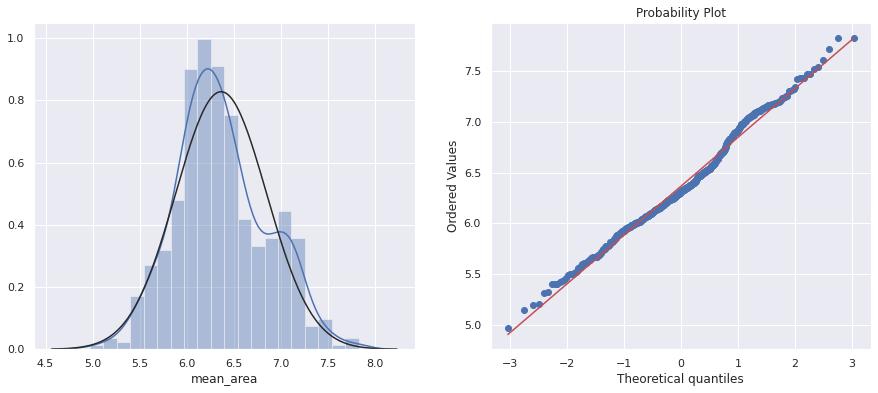

In [55]:
#applying log transformation
df['mean_area'] = np.log(df['mean_area'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df, 'mean_area')

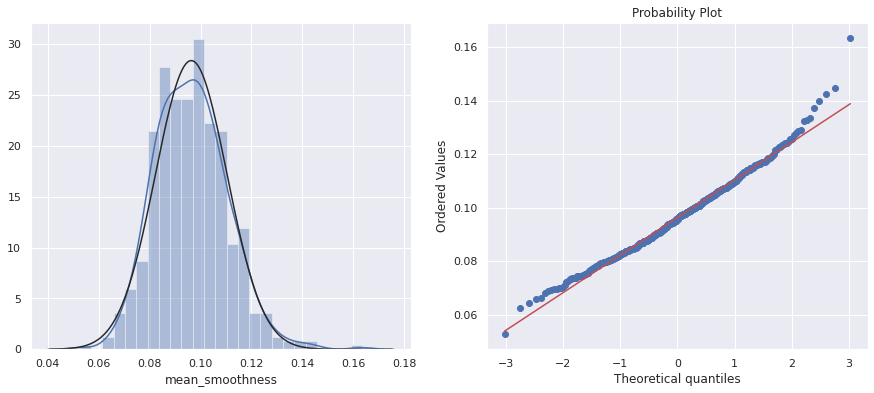

In [56]:
diagnostic_plots(df, 'mean_smoothness')

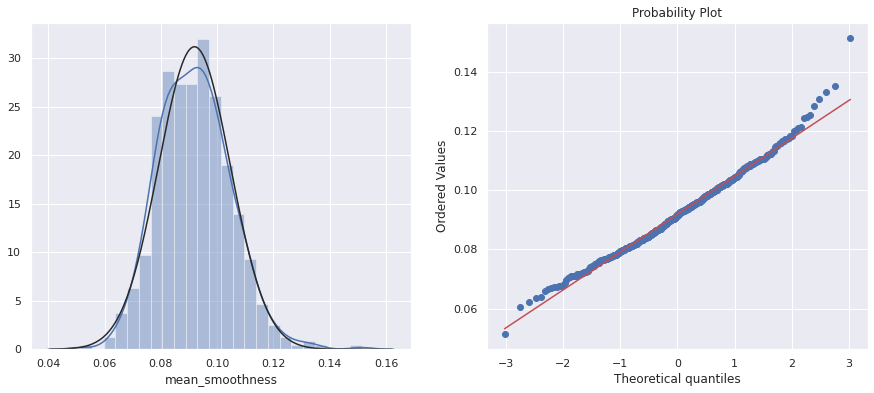

In [57]:
#applying log transformation
df['mean_smoothness'] = np.log(df['mean_smoothness'] + 1)# +1 is added in case there is any 0 input to it which would create issue in taking log
diagnostic_plots(df, 'mean_smoothness')

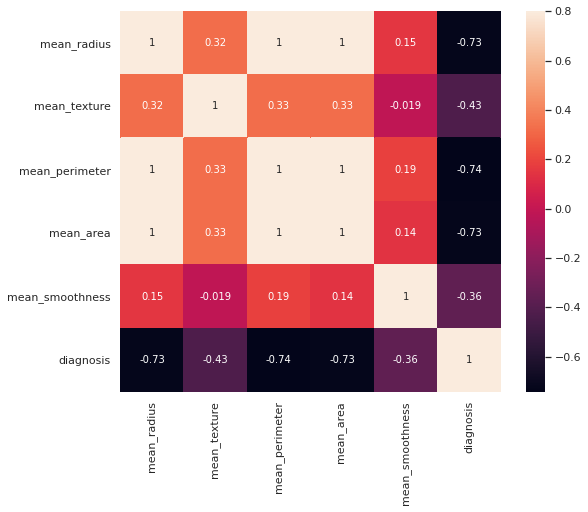

In [58]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


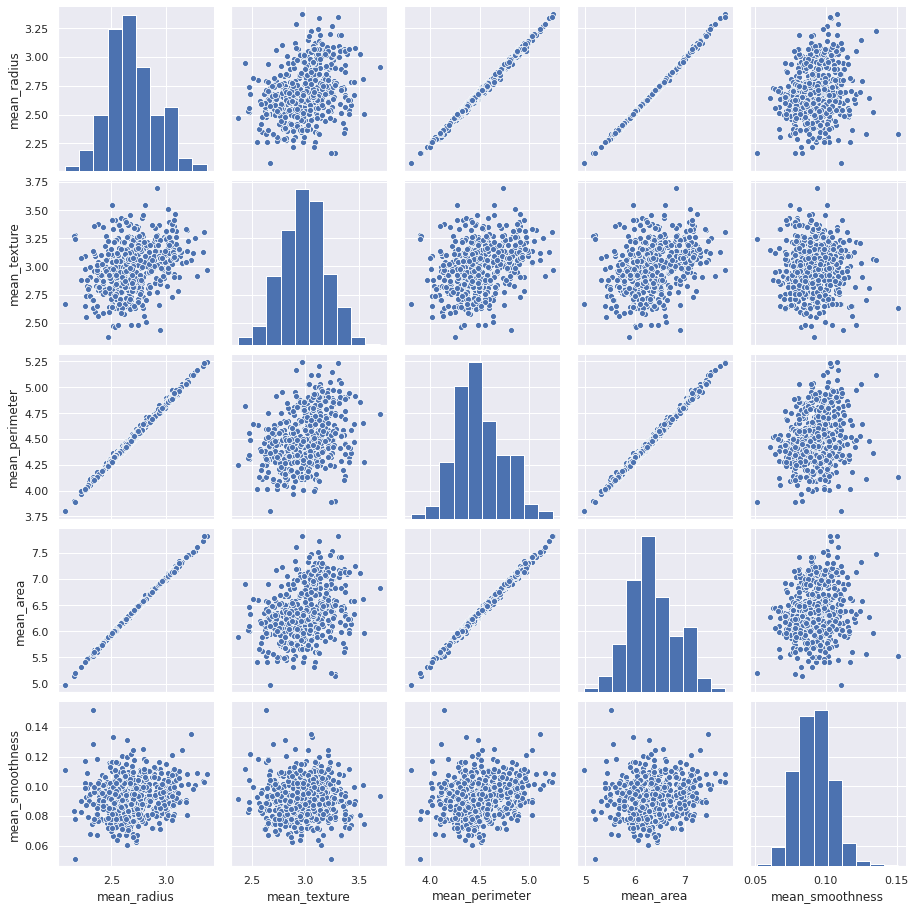

In [59]:
#pairplot
sns.set()
cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
sns.pairplot(df[cols], size = 2.5)
plt.show();

**Modelling**

In [60]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = True)
y.head(3)

0    0
1    0
2    0
Name: diagnosis, dtype: int64

In [61]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [89]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accu_reg = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", accu_reg*100)

Accuracy score using Random Forest: 90.95744680851064


In [90]:
#support vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
accu_svc = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", accu_svc*100)

Accuracy score using Random Forest: 92.02127659574468


In [91]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
accu_knn = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", accu_knn*100)

Accuracy score using Random Forest: 92.02127659574468


In [92]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", acc_gaussian*100)

Accuracy score using Random Forest: 94.14893617021278


In [96]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", acc_decision_tree*100)

Accuracy score using Random Forest: 92.02127659574468


In [98]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, Y_pred)
print("Accuracy score using Random Forest:", acc_random_forest*100)

Accuracy score using Random Forest: 95.2127659574468


In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [accu_svc, accu_knn, accu_reg, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.952128
4,Naive Bayes,0.941489
0,Support Vector Machines,0.920213
1,KNN,0.920213
5,Decision Tree,0.920213
2,Logistic Regression,0.909574


We have seen that Random Forest gives the maximum accuracy.

Thank You for reading it till the end.